# Miljødata Visualisering & Prediksjon

Denne notebooken visualiserer og diskuterer resultatene fra prosjektet. Alle analyser er gjort over kun fem dager for å fokusere på metodene som er brukt, men kan enkelt utvides til lengre tidshorisonter. 

## Imports

In [1]:
# Import av nødvendige biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os

# Legg til visualisering-mappen til Python path
sys.path.append('visualisering')

# Sett matplotlib backend for interaktive plots
%matplotlib inline

# Sett stil for plots
plt.style.use('default')
sns.set_palette("husl")

## 1. Sammenligning av utvekslingsbyer

Sammenligning av PM2.5-nivåer i utvekslingsbyer:


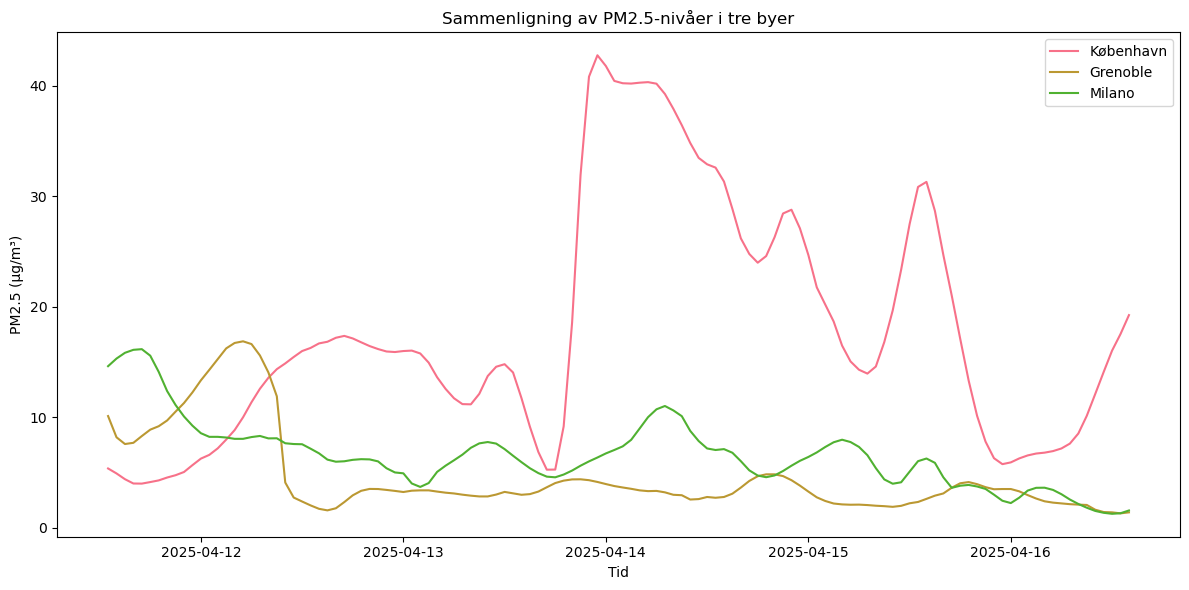

In [2]:
# Import funksjoner for utvekslingsbyer
from visualisering_utveksling import compare_exchange_cities, create_correlation_heatmap

# Sammenlign PM2.5 nivåer i utvekslingsbyer
print("Sammenligning av PM2.5-nivåer i utvekslingsbyer:")
exchange_df = compare_exchange_cities()

Plottet over sammenligner luftkvaliteten (PM2.5) i København, Grenoble og Milano over tidshorisonten. København har en tydelig økning ved dag 3.

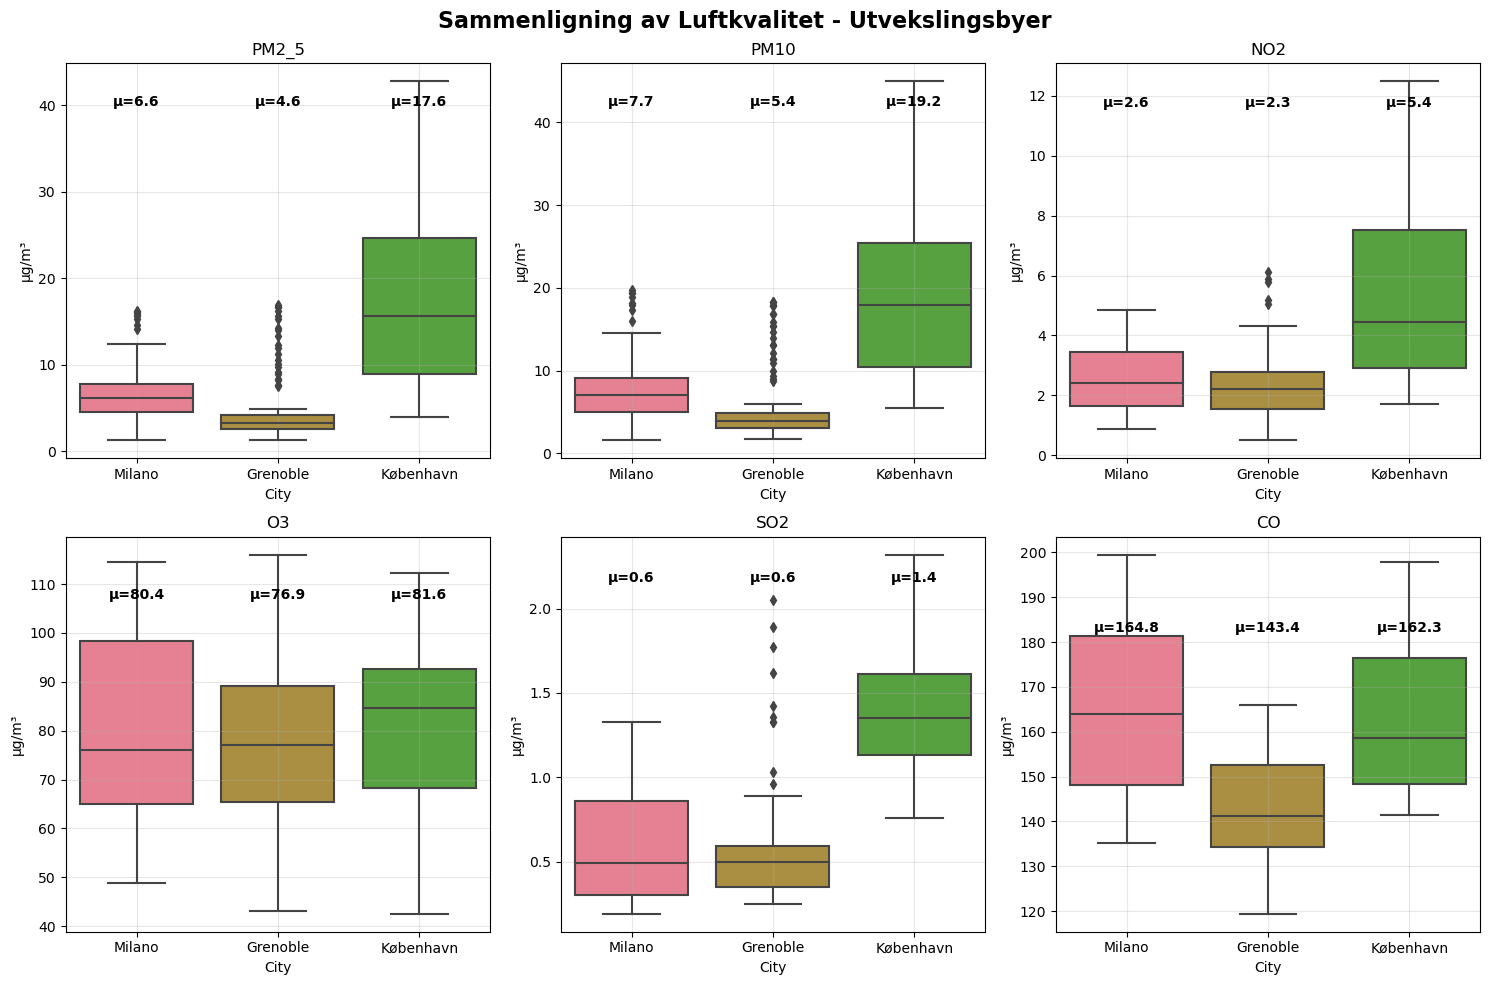


Sammendrag (gjennomsnittsverdier i μg/m³):
------------------------------------------------------------
     City PM2_5 PM10 NO2   O3 SO2    CO
   Milano   6.6  7.7 2.6 80.4 0.6 164.8
 Grenoble   4.6  5.4 2.3 76.9 0.6 143.4
København  17.6 19.2 5.4 81.6 1.4 162.3


In [3]:
from src.predict_polution import load_city_data, compare_cities

# Define the three exchange cities
cities = ['Milano', 'Grenoble', 'København']
city_data = {}

# Load data for each city
for city in cities:
    city_data[city] = load_city_data(city)
compare_cities(city_data)

København ligger jevnt over på høyere verdier av forurensende stoffer. Milano har særlig høye forekomster av CO, mens Grenoble er den minst forurensede av de tre over dagene vi ser på.

Korrelasjon mellom forurensningskomponenter:


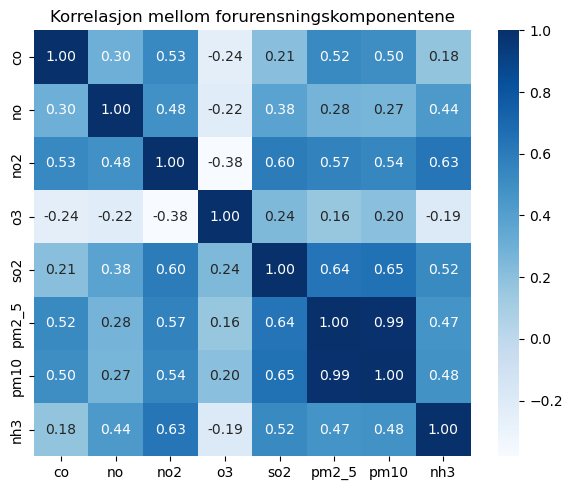

In [4]:
# Lag korrelasjonsheatmap for utvekslingsbyer
print("Korrelasjon mellom forurensningskomponenter:")
corr_matrix = create_correlation_heatmap(exchange_df)

Plottet viser korrelasjonen mellom de ulike forurensingskomponentene vi har inkludert i analysen over alle byer over hele tidshorisonten. De fleste komponentene har positiv korrelasjon, som vil si at de øker og synker sammen, foruten O3 som negativt samvarierer med alle komponentene utenom SO2, PM2.5 og PM10. Videre er komponentene PM2.5 og PM10 nærmest identiske.

## 2. Forurensing i Europeiske storbyer

Visualisering av data fra alle byer i datasettet.

In [5]:
# Import funksjoner for alle byer
from visualisering_byer import (
    load_all_city_data, 
    create_pm25_boxplot, 
    create_average_pollution_barplot,
    create_pollution_correlation_heatmap,
    visualize_all_cities
)

# Last inn data for alle byer
print("Laster inn data for alle byer...")
all_cities_df = load_all_city_data()
print(f"Data lastet for {all_cities_df['by'].nunique()} byer med {len(all_cities_df)} målinger totalt")

Laster inn data for alle byer...
Data lastet for 23 byer med 2806 målinger totalt


PM2.5 spredning per by:


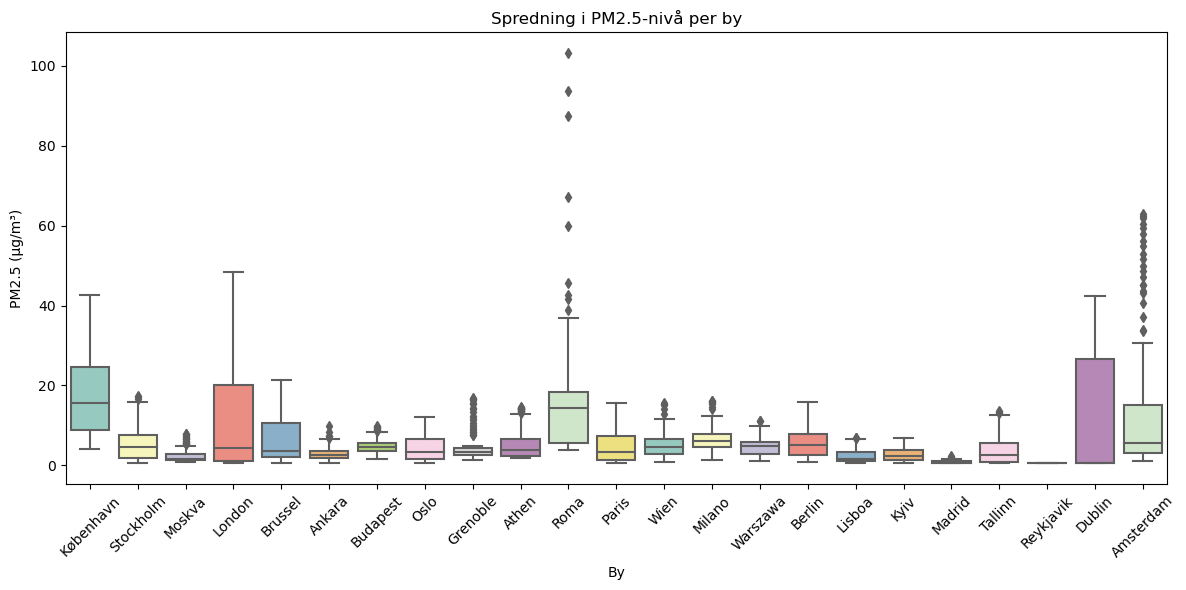

In [6]:
# Lag boxplot for PM2.5 spredning
print("PM2.5 spredning per by:")
create_pm25_boxplot(all_cities_df)

Box-plottet viser fordelingen av PM2.5 for hver by gjennom tid. Høyden på boksen indikerer variansen i dataen mens midtstreken viser medianen. Byer som London, Dublin og København har veldig høy spredning i forurensnignsverdi, muligens mellom dag og natt, mens for eksempel Roma har en mer konstant høy forurensing.

Gjennomsnittlig forurensning per by:


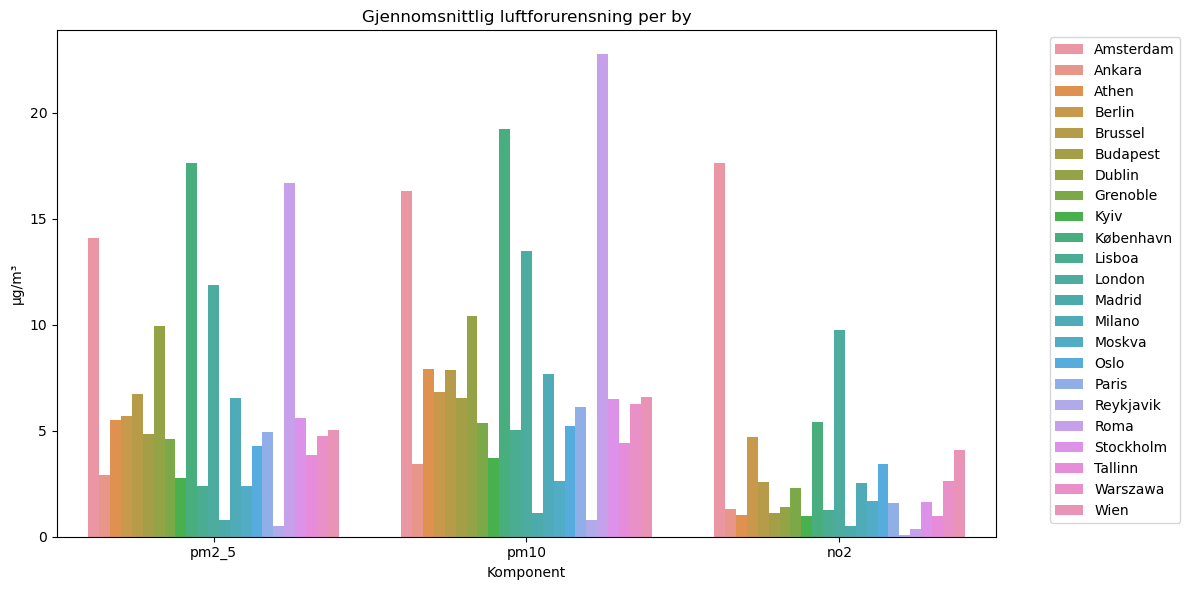

In [7]:
# Lag søylediagram for gjennomsnittlig forurensning
print("Gjennomsnittlig forurensning per by:")
create_average_pollution_barplot(all_cities_df)

Dette viser gjennomsnittet for PM10 og NO2 i tillegg til PM2.5 for de samme byene. Vi ser igjen at det nærmest er et 1-til-1 forhold mellom PM2.5 og PM10.

Vi kan også ta en nærmere titt på Air Quality Index (AQI) verdier for et mindre utvalg byer. Her ser vi at the bare er Paris som scorer "utmerket" på denne indexen, mens Madrid og Ankara er de eneste som scorer "bra". Resten av storbyene, inkludert Oslo, har ligger jevnt spredd rundt "moderat" luftkvalitet.

Laster inn luftkvalitet byer data...
Byer data lastet: 10 målinger
Kolonner: ['By', 'AQI', 'category', 'main_pollutant']


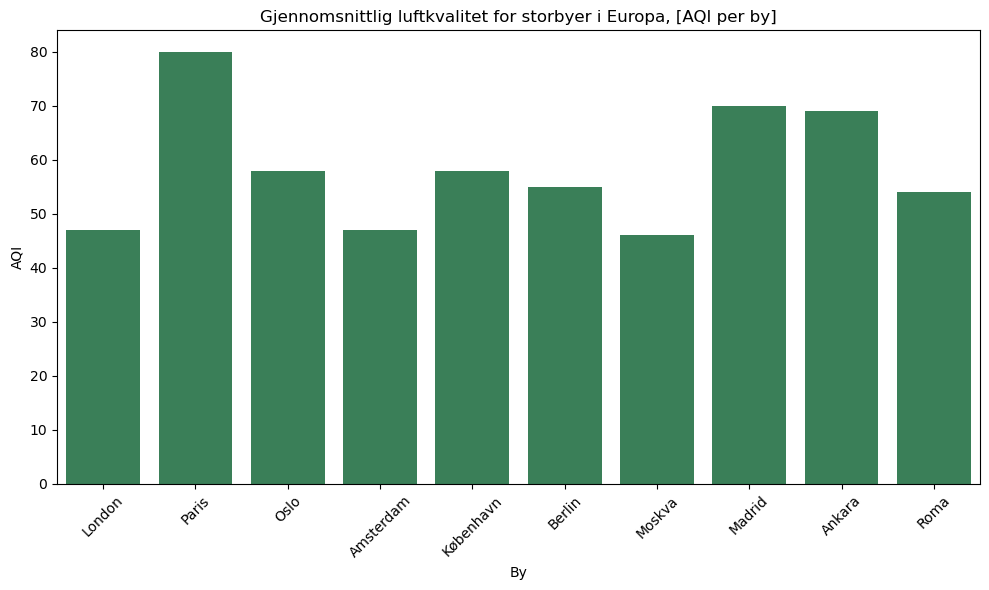

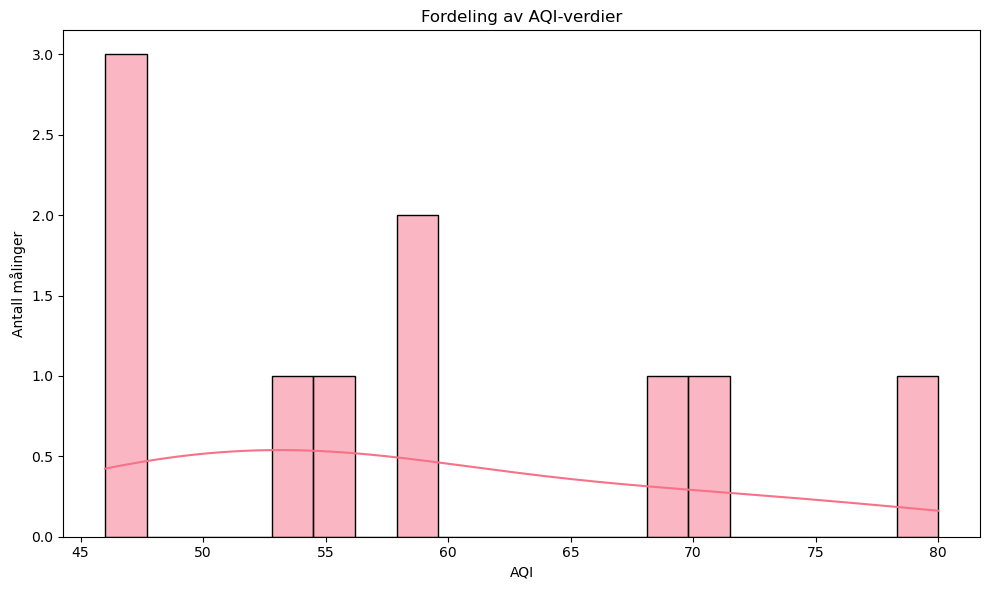

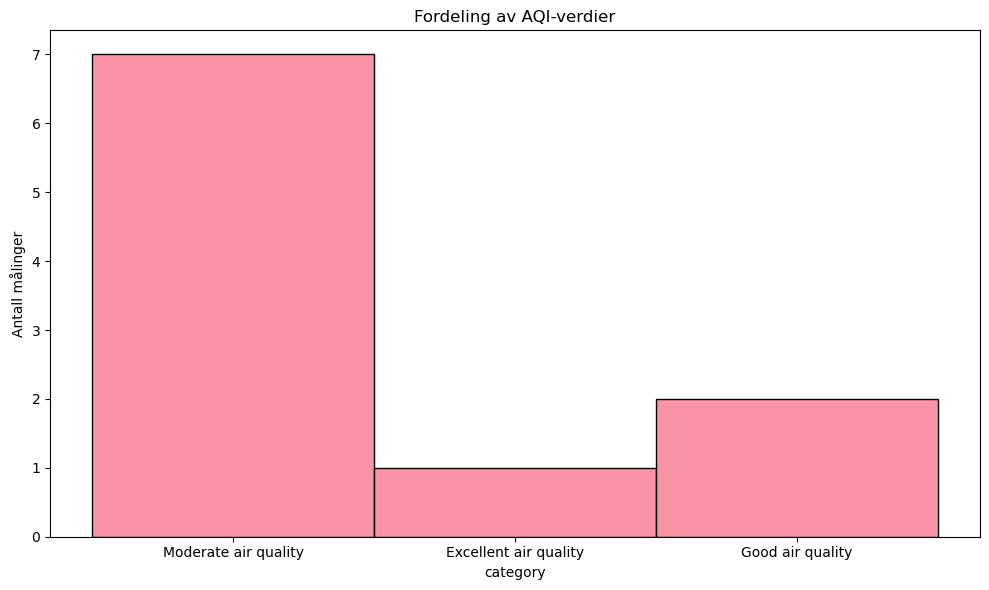

In [8]:
from visualisering.visualisering2 import laste_data, lag_grafer

# Test med luftkvalitet byer data
print("Laster inn luftkvalitet byer data...")
byer_filepath = "data/clean/luftkvalitet_byer_clean.csv"
byer_df = laste_data(byer_filepath)

if byer_df is not None:
    print(f"Byer data lastet: {len(byer_df)} målinger")
    print("Kolonner:", list(byer_df.columns))
    lag_grafer(byer_df)
else:
    print("Kunne ikke laste byer data")

### 3. Forurensingstyper i Europeiske byer

In [9]:
# Import funksjoner for forurensning per by
from visualisering_by_forurensning import (
    load_pollution_by_city_data,
    create_pollution_comparison_by_type,
    create_pollution_comparison_by_city,
    create_pollution_frequency_histogram,
    visualize_pollution_by_city
)

# Last inn forurensningsdata per by
pollution_df = load_pollution_by_city_data()
print(f"Data lastet: {len(pollution_df)} målinger")
print(pollution_df.head())

Data lastet: 18 målinger
       By Forurensning  Gjennomsnittlig verdi
0  Ankara   As in PM10                2.50000
1  Ankara  BaP in PM10                2.50000
2  Ankara   Cd in PM10                2.50000
3  London           O3                5.33750
4  London        PM2.5                4.65625


Sammenligning av forurensningstyper per by:


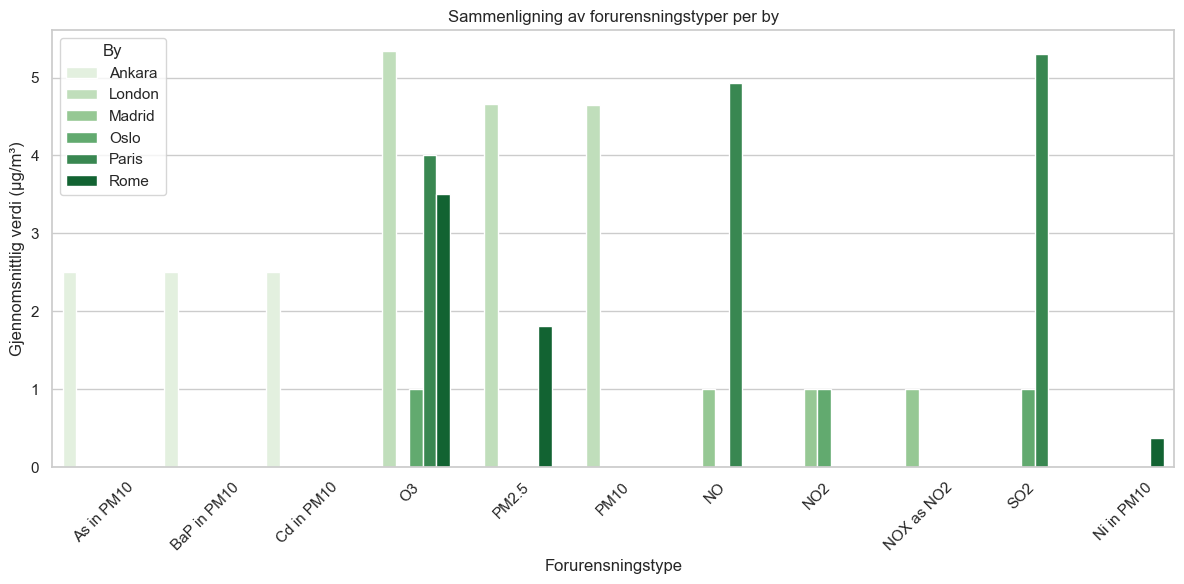

In [10]:
# Sammenligning av forurensningstyper per by
print("Sammenligning av forurensningstyper per by:")
create_pollution_comparison_by_type(pollution_df)

Forurensningsnivåer per by etter komponent:


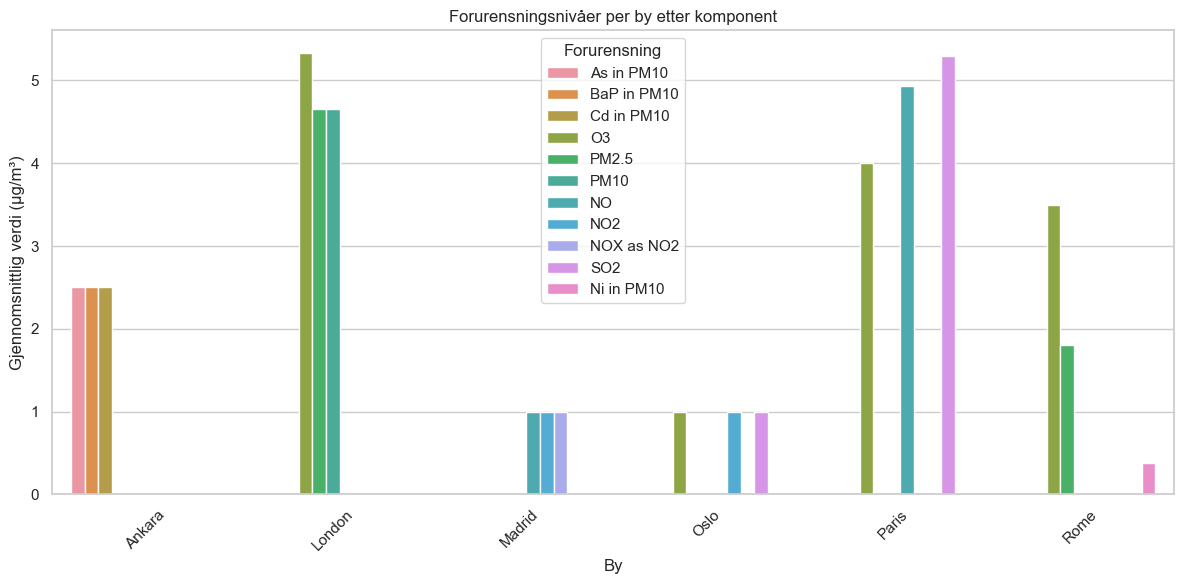

In [11]:
# Forurensningsnivåer per by etter komponent
print("Forurensningsnivåer per by etter komponent:")
create_pollution_comparison_by_city(pollution_df)

## 4. Luftkvalitet i Norge

Vi kan også bruke dataen til å få en rask oversikt over hvordan det står til i Norge. Første plot viser luftkvaliteten for de største norske byene. Her skiller særlig Lillesand og Kristiansand seg ut med dårlig luftkvalitet. Videre viser det andre plottet fordelingen av ulike forurensingskomponenter. Særlig har PM10 og PM2.5 en fordeling med flere "outliers", hvor enkelte tidspunkt har markert uvanlig høye verdier.

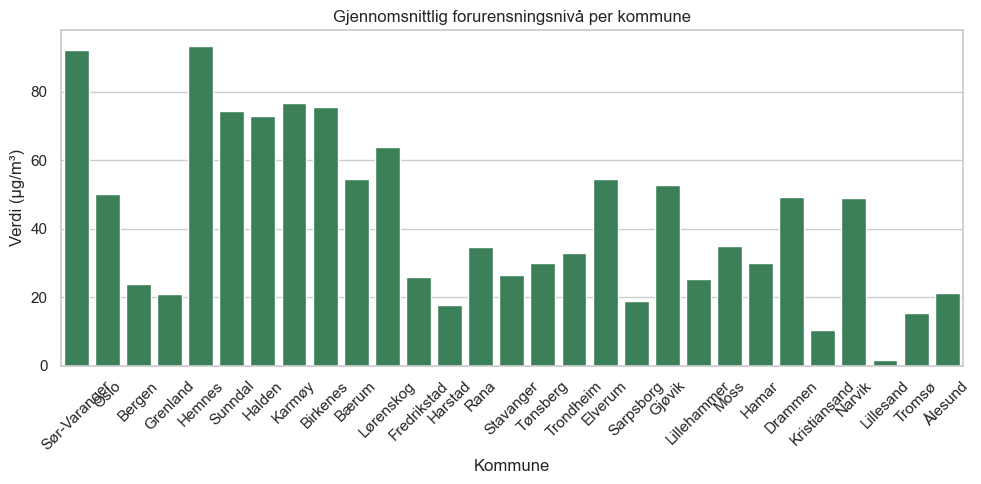

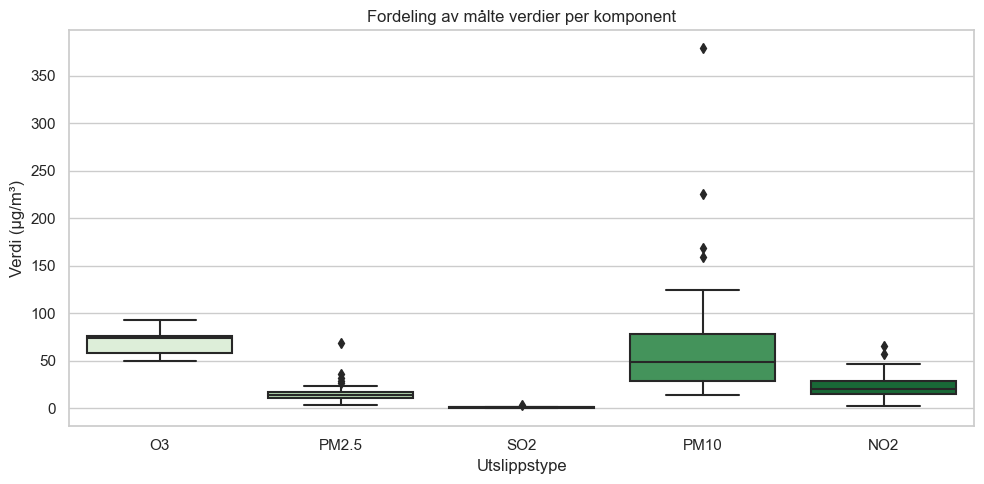

In [12]:
# Import funksjoner fra visualisering2

# Test med luftkvalitet NILU data
nilu_filepath = "data/clean/luftkvalitet_nilu_clean.csv"
nilu_df = laste_data(nilu_filepath)

if nilu_df is not None:
    lag_grafer(nilu_df)
else:
    print("Kunne ikke laste NILU data")

## 5. Prediktiv analyse

For hver av byene vi er på utveksling i, altså Grenoble, Milano og København, viser vi en enkel prediktiv analyse i form av en Lineær regresjon på ulike komponenter isolert. For PM2.5 bruker vi de dataen fra de fire første dagene til å trene in Lineær regresjonsmodell, som predikerer verdien for den resterende dagen, ved å bruke no2, o3, so2, co, nh3 som forklaringsvariabler. Merk at vi ikke bruker PM10, da tidligere analyser viser at disse er 1-til-1. Vi rapporterer Rˆ2 og RMSE på testdataen. 
I tillegg inkluderer vi en enklere lineær regresjon på hver enkelt variabel gjennom tid. Dette for å fremheve at grunnet sykliske svingninger er ikke nødvendigvis lineær regresjon passende.

In [13]:
from src.predict_polution import load_city_data, analyze_single_city, visualize_city_trends, compare_cities

# Define the three exchange cities
cities = ['Milano', 'Grenoble', 'København']
city_data = {}

# Load data for each city
for city in cities:
    city_data[city] = load_city_data(city)

### Milano

Number of measurements: 122
Time span: 5 days

Available pollutants: pm2_5, no2, o3, so2, co, nh3

Linear Regression Analysis for PM2_5:
--------------------------------------------------
Features used: no2, o3, so2, co, nh3
Training period: 2025-04-11 13:00:00 to 2025-04-15 13:00:00
Test period: 2025-04-15 14:00:00 to 2025-04-16 14:00:00
Training samples: 97
Test samples: 25
Test R²: -6.328
Test RMSE: 3.470


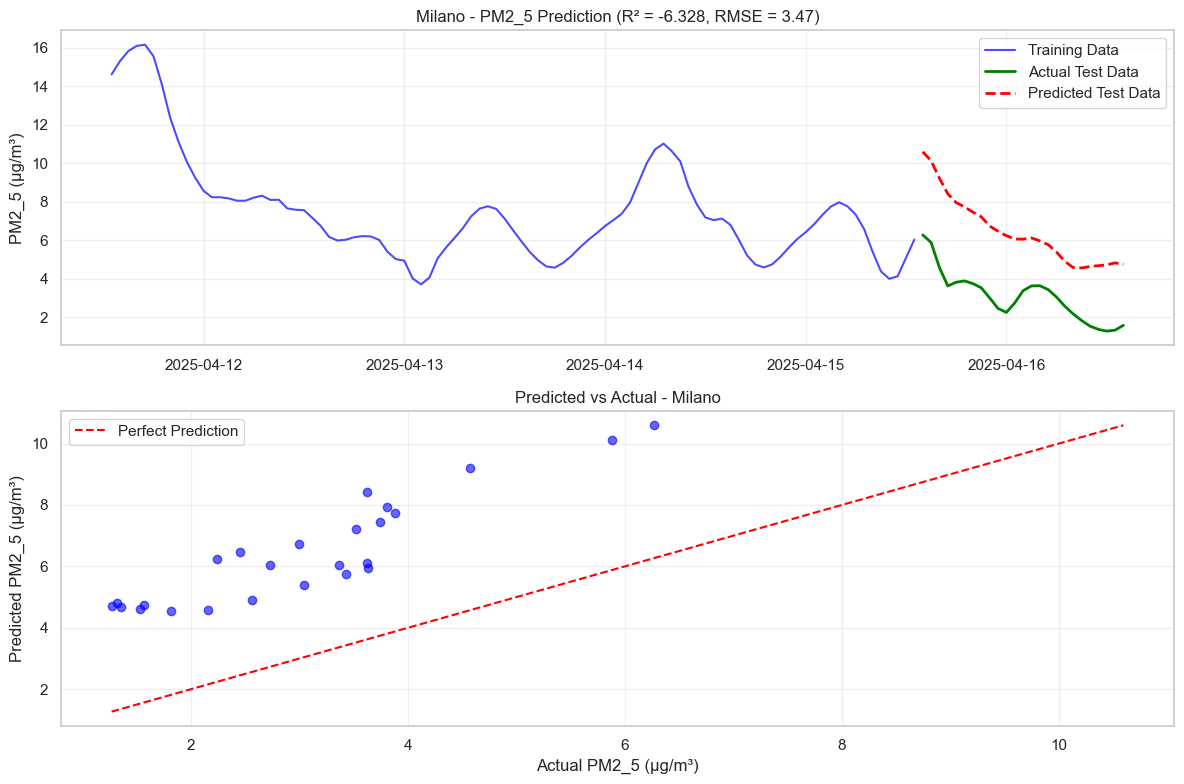

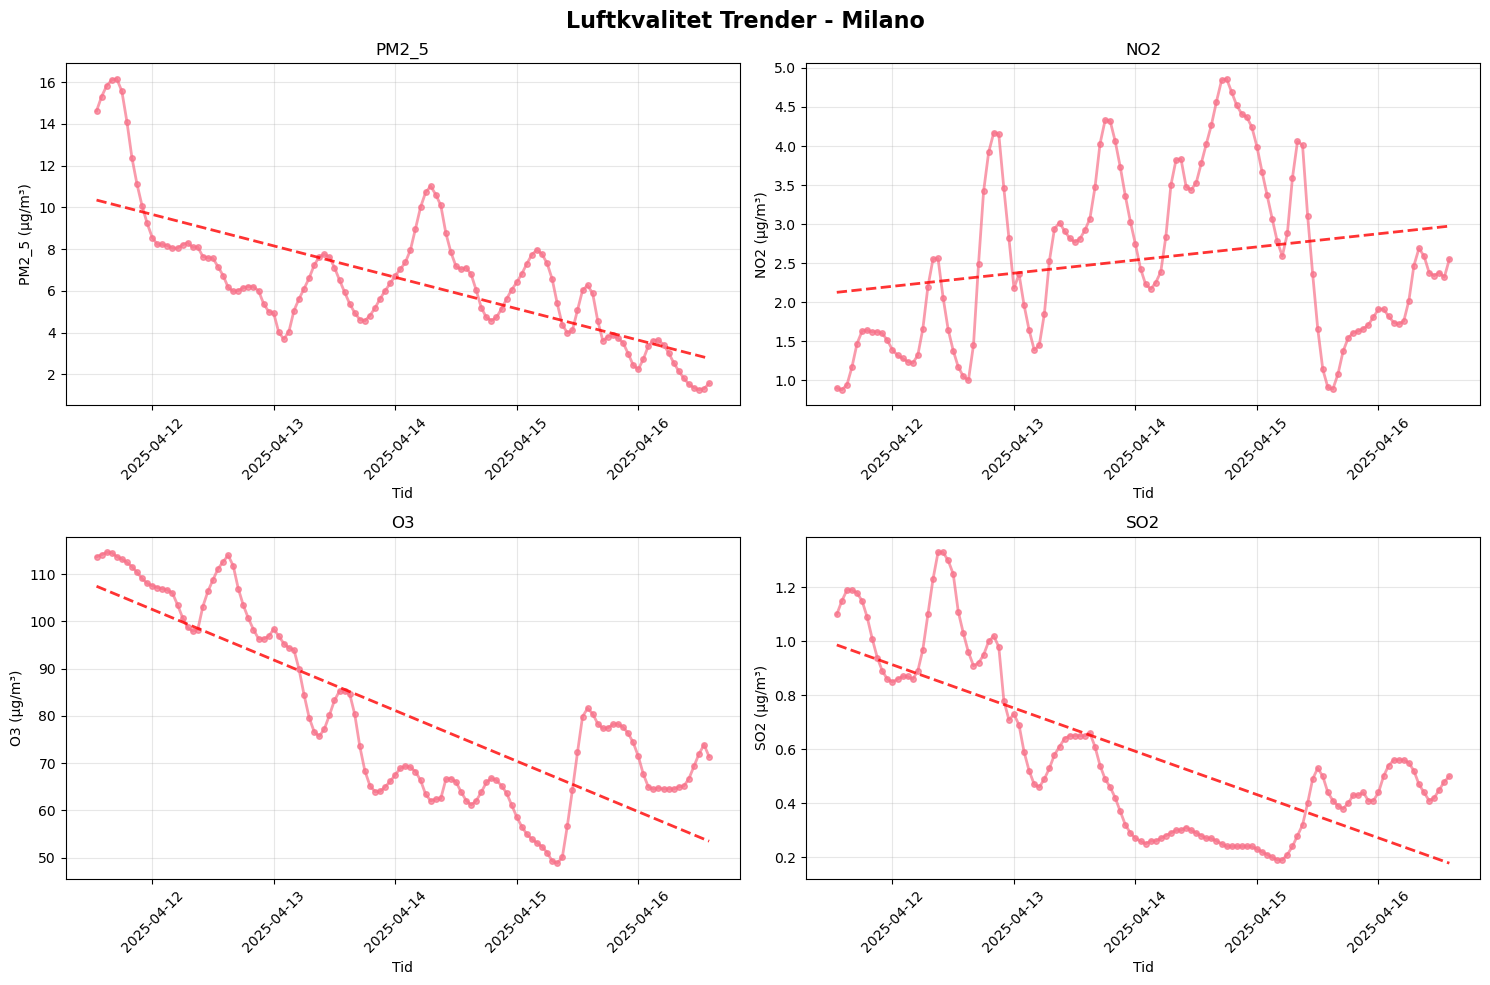

In [14]:
city = 'Milano'
pollutants = analyze_single_city(city_data[city], city)
visualize_city_trends(city_data[city], city, pollutants)

### Grenoble

Number of measurements: 122
Time span: 5 days

Available pollutants: pm2_5, no2, o3, so2, co, nh3

Linear Regression Analysis for PM2_5:
--------------------------------------------------
Features used: no2, o3, so2, co, nh3
Training period: 2025-04-11 13:00:00 to 2025-04-15 13:00:00
Test period: 2025-04-15 14:00:00 to 2025-04-16 14:00:00
Training samples: 97
Test samples: 25
Test R²: -5.266
Test RMSE: 2.207


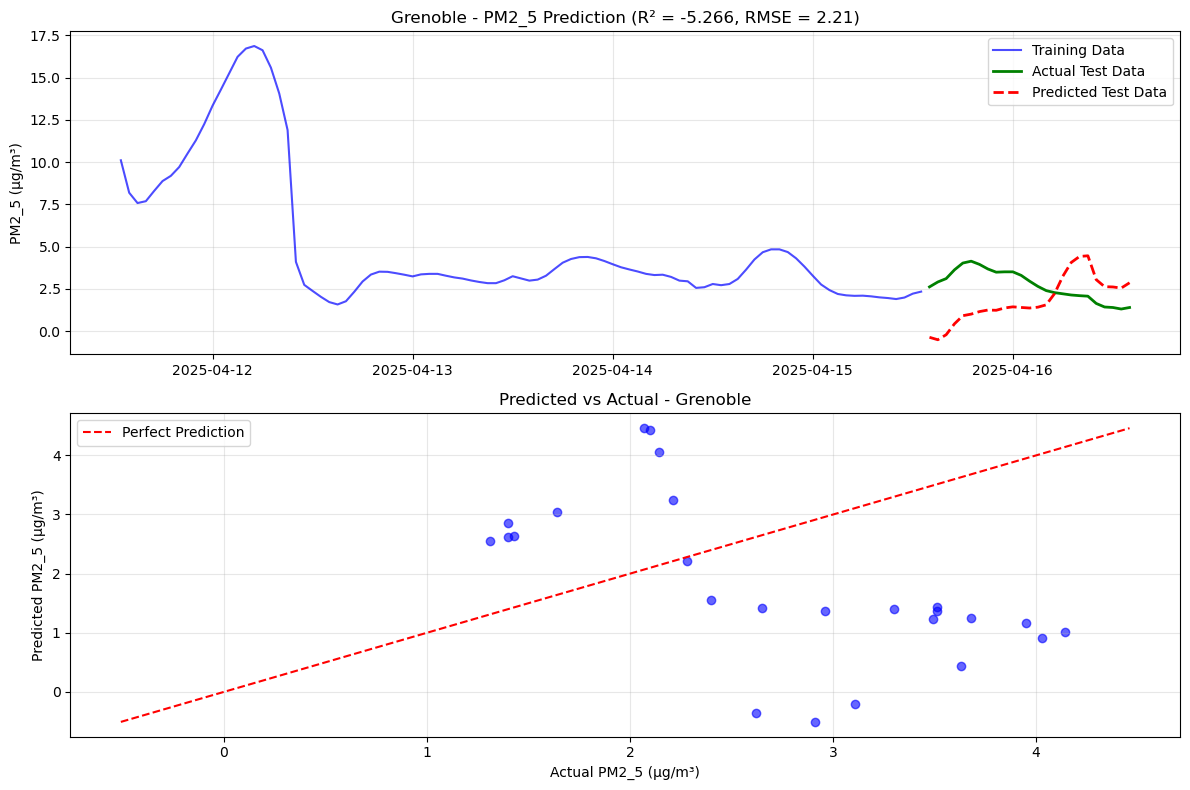

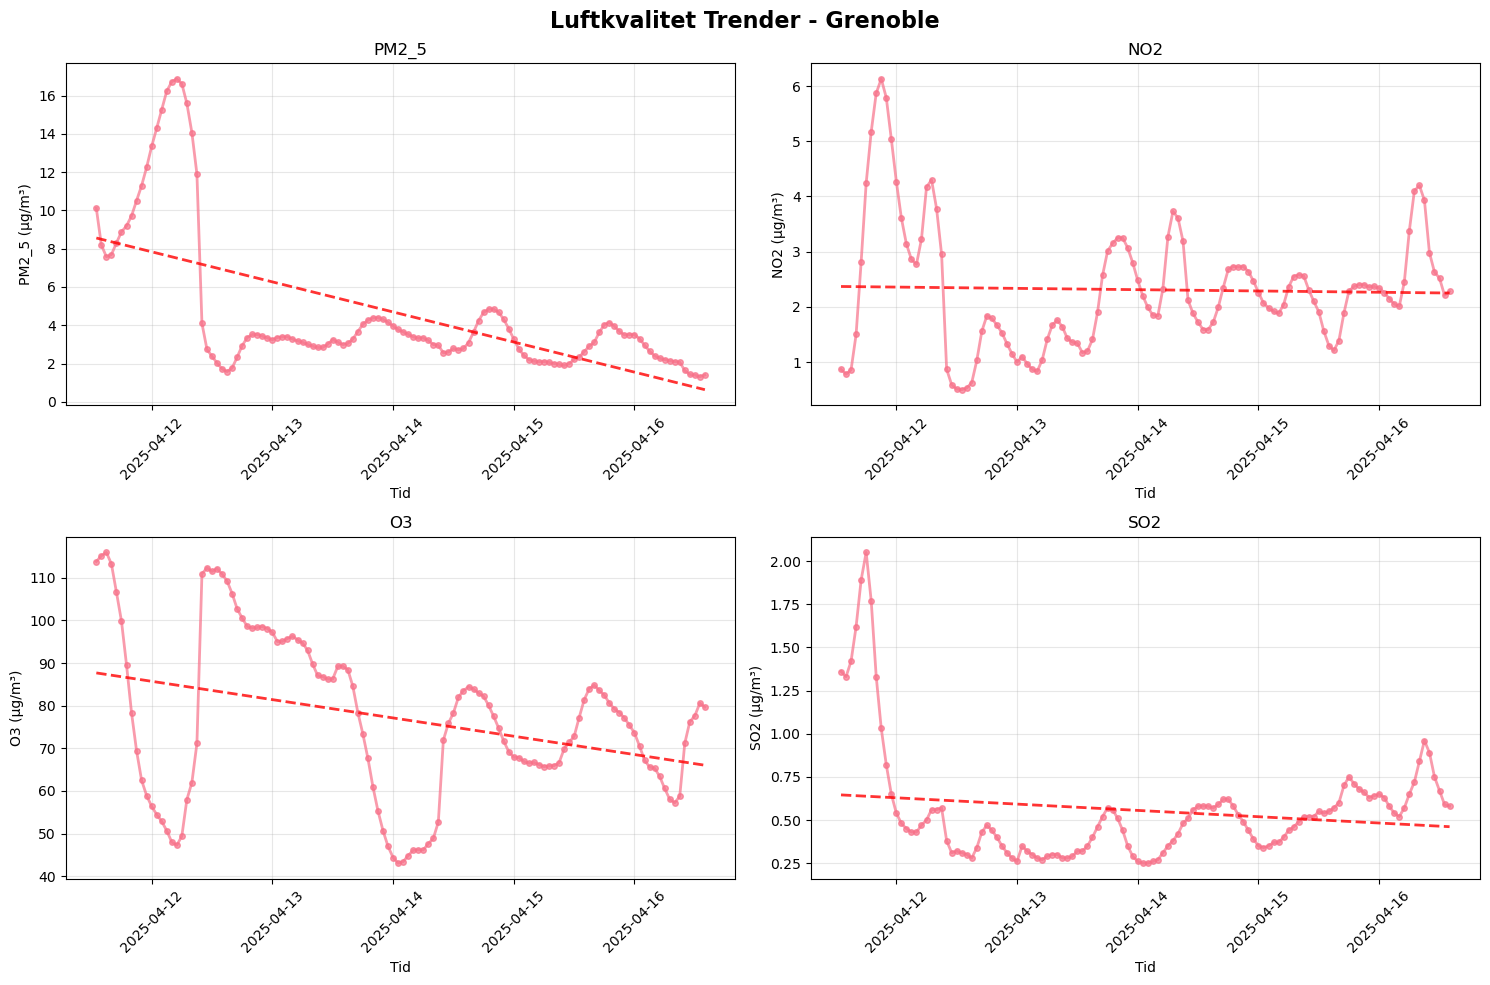

In [15]:
city = 'Grenoble'
pollutants = analyze_single_city(city_data[city], city)
visualize_city_trends(city_data[city], city, pollutants)

### København

Number of measurements: 122
Time span: 5 days

Available pollutants: pm2_5, no2, o3, so2, co, nh3

Linear Regression Analysis for PM2_5:
--------------------------------------------------
Features used: no2, o3, so2, co, nh3
Training period: 2025-04-11 13:00:00 to 2025-04-15 13:00:00
Test period: 2025-04-15 14:00:00 to 2025-04-16 14:00:00
Training samples: 97
Test samples: 25
Test R²: -2.220
Test RMSE: 13.141


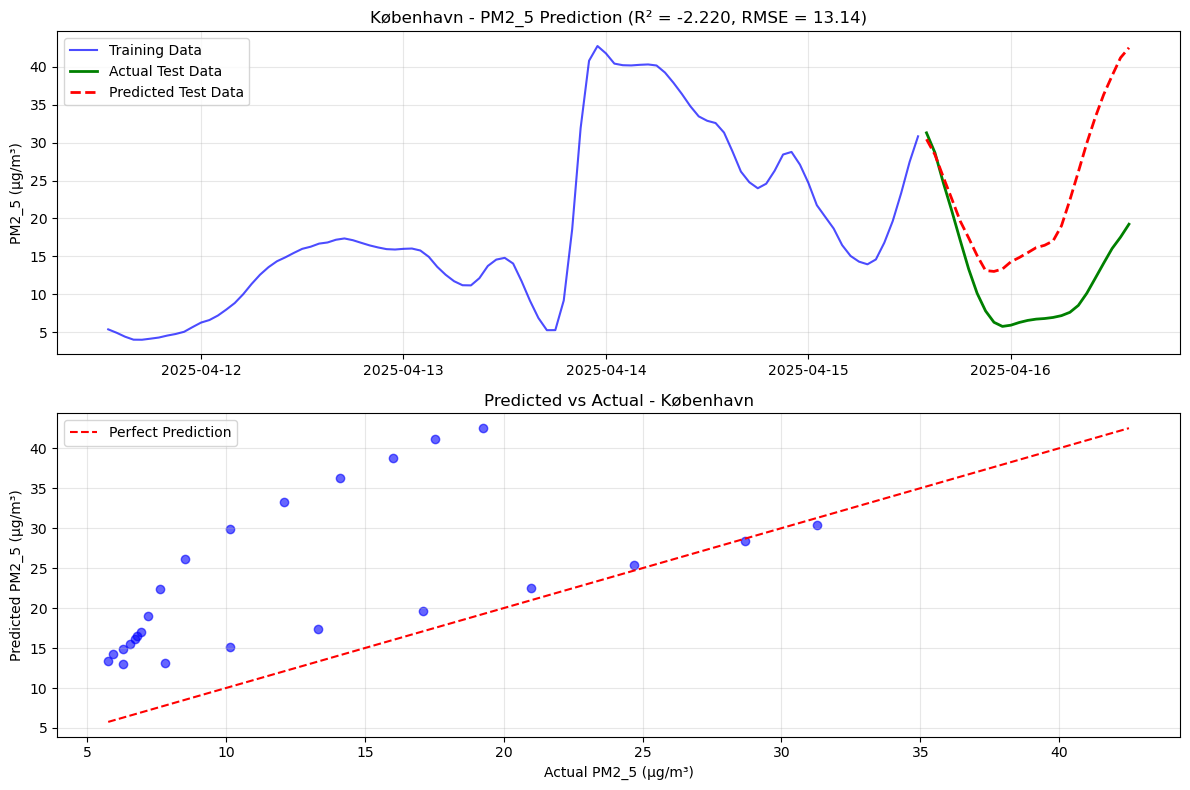

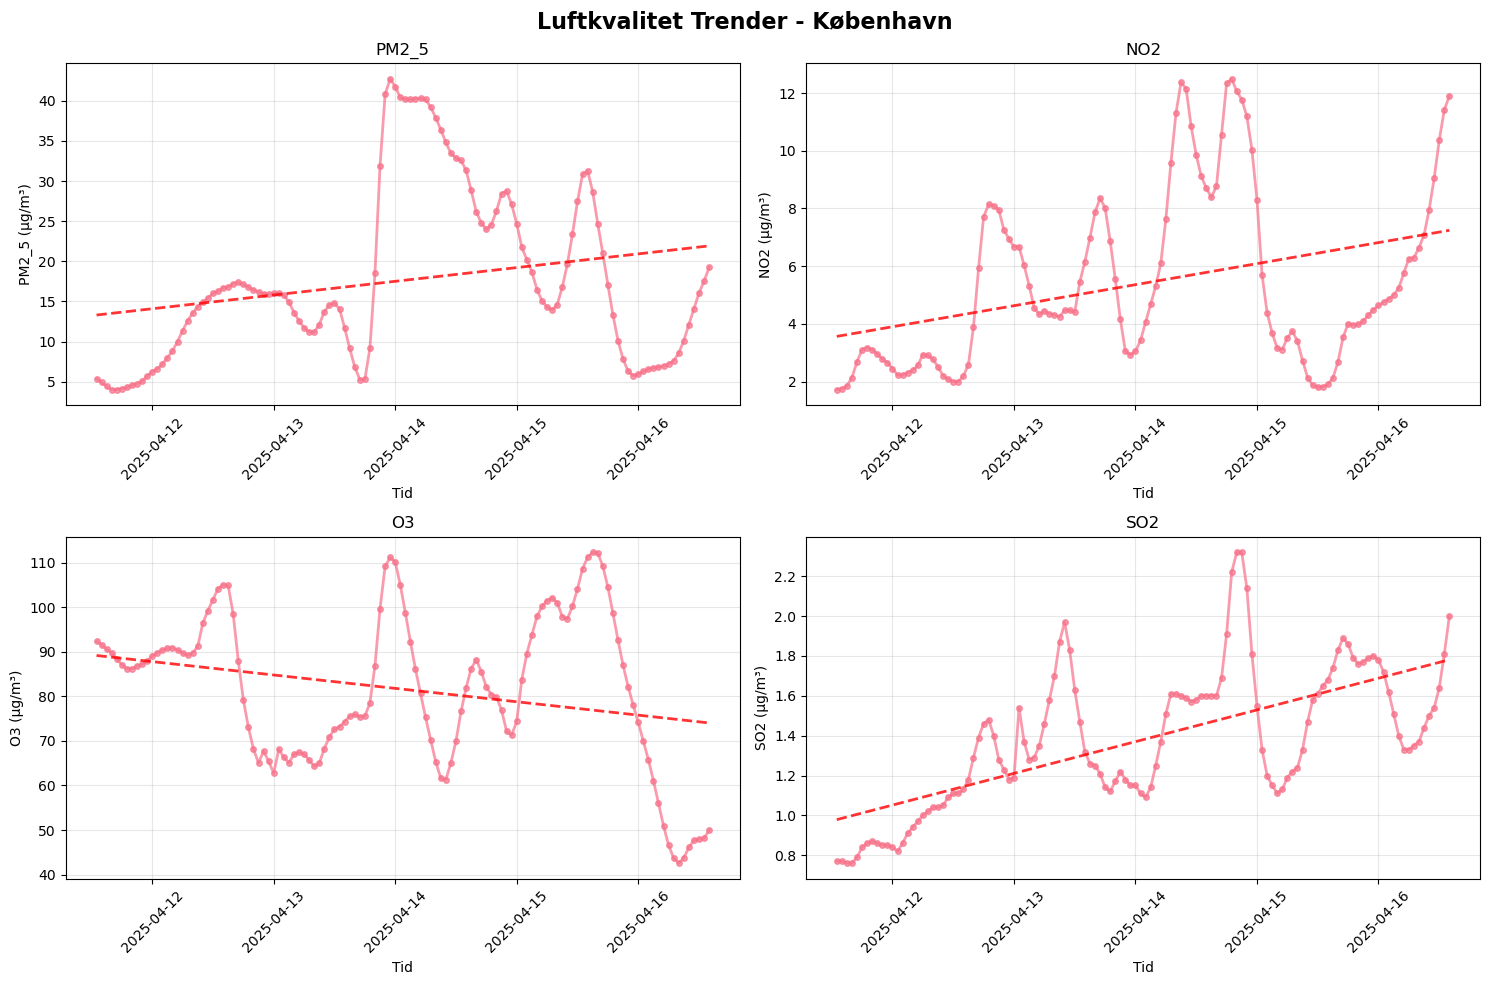

In [16]:
### København
city = 'København'
pollutants = analyze_single_city(city_data[city], city)
visualize_city_trends(city_data[city], city, pollutants)